# Health Survey Data Analysis

Lirui Guan

## Executive Summary

This project is to find out if a person's physical health is affected by owning or renting a home in New York state from survey responses from 2020-2021. 
- The distribution of number of days of being not good on physical health is similar for both renting and owning home
- The average number of days of being not good on physical health for owning home and renting is 11 days and 12 days, respectively
- Given the existing evidence, there is no statistically significant difference of the average days of being not physical healthy between owning home and renting

## The Data

The data uses the health data from the [CDC Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/data_documentation/index.htm). Specifically this subset of the data represents survey responses from the 2020-2021 survey in the state of New York. Each record represents a survey response.

- The `PHYSHLTH` column in the data set represents the days of the individual's physical health not being good in the last 30 days
- The `RENTHOM1` column in the data set represents if the individual owns or rents a home.
- The value in the data set uses the number as "codes" to represent the actual value in the [codebook](https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf) from the CDC.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,36,11,11172020,11,17,2020,1200,2020000001,2020000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,36,1,1182020,1,18,2020,1200,2020000002,2020000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,36,4,5042020,5,4,2020,1200,2020000003,2020000003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,36,1,1222020,1,22,2020,1200,2020000004,2020000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,36,3,3102020,3,10,2020,1200,2020000005,2020000005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
df.shape

(14769, 279)

In [4]:
df['PHYSHLTH'].describe()

count    14769.000000
mean        67.801815
std         34.082730
min          1.000000
25%         30.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [5]:
df['RENTHOM1'].value_counts()

1.0    8587
2.0    5370
3.0     608
9.0     147
7.0      57
Name: RENTHOM1, dtype: int64

In [6]:
df[['PHYSHLTH', 'RENTHOM1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14769 entries, 0 to 14768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PHYSHLTH  14769 non-null  float64
 1   RENTHOM1  14769 non-null  float64
dtypes: float64(2)
memory usage: 230.9 KB


## Data Preparation
- `PHYSHLTH` column contains values range from 1 to 99, as well as blanks(NaN). According the codebook from CDC, values 1 - 30 are actual days that are needed for analysis.
    * Converting all instances of 88 (None) to 0
    * Dropping all records where `PHYSHLTH` is 77, 99, or blank (NaN)
    
- `RENTHOM1` column contains values 1 (own), 2 (rent), as well as others accroding to the codebook from CDC
    * Drop other records with values other than 1 and 2

In [7]:
# Convert instances of 88 to 0 in column PHYSHLTH
df['PHYSHLTH'].replace(88, 0, inplace = True)

In [8]:
# Drop records where PHYSHLTH is 77 and 99
df = df.loc[df['PHYSHLTH'].isin([77, 99]) == False]

In [9]:
# Replace blank records to NaN if there are any, and drop all records where PHYSHLTH is NaN
df['PHYSHLTH'].replace('', np.nan, inplace = True)

In [10]:
df.dropna(subset=['PHYSHLTH'], inplace = True)

In [11]:
df['PHYSHLTH'].describe()

count    14440.000000
mean         3.083795
std          7.592715
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [12]:
# Drop records with values other than 1 and 2 in RENTHOM1.
df = df[df['RENTHOM1'].isin([1.0, 2.0])]

In [13]:
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

In [14]:
df[['PHYSHLTH', 'RENTHOM1']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13659 entries, 0 to 14767
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PHYSHLTH  13659 non-null  float64
 1   RENTHOM1  13659 non-null  float64
dtypes: float64(2)
memory usage: 320.1 KB


## Confidence Interval for Mean of `PHYSHLTH`

In [15]:
# Randomly select 500 samples from PHYSHLTH
sample = df['PHYSHLTH'].sample(n = 500, random_state = 100)
sample_size = len(sample)
sample_mean = sample.mean()
sample_sd = sample.std()
se = stats.sem(sample)

ci = stats.t.interval(alpha = 0.95, loc = sample_mean, scale = se, df = sample_size - 1)
print('The confidence interval for mean of PHYSHLTH at 95% confidence level is ', ci)

The confidence interval for mean of PHYSHLTH at 95% confidence level is  (2.3983225653530025, 3.717677434646997)


- With sample size of 500, we are 95% confident that the true mean of PHYSHLTH falls within 2.4 and 3.7.

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

- To find out if the physical health is affected by the housing status of an individual, we can test if there  is statistically significant difference of the mean of PHYSHLTH between one owns home and one rents. 

- By spliting the data based on `RENTHOM1`, one can use statistic t-test to test if two samples means are significantlly different. 

In [16]:
# Separate the records based on the value of RENTHOM1. Note: value 1 is own and value 2 is rent in RENTHOM1

df_own = df.loc[df['RENTHOM1'] == 1, 'PHYSHLTH']
df_rent = df.loc[df['RENTHOM1'] == 2, 'PHYSHLTH']
print('The mean value of own sample is ', df_own.mean())
print('The mean value of rent sample is ', df_rent.mean())

The mean value of own sample is  2.675854726132734
The mean value of rent sample is  3.6959277756434883


In [17]:
import seaborn as sns

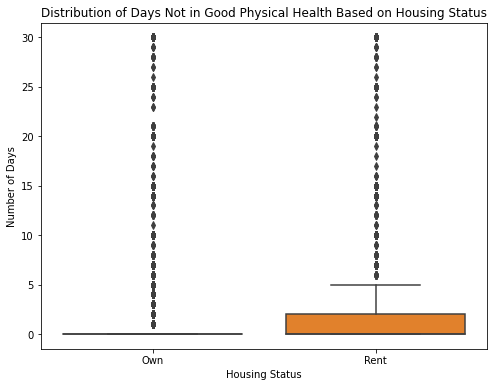

In [18]:
# Boxplot of PHYSHLTH based on the value of RENTHOM1
fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data = df, x = 'RENTHOM1', y = 'PHYSHLTH', ax = ax)
ax.set_xlabel('Housing Status')
ax.set_ylabel('Number of Days')
ax.set_xticklabels(['Own', 'Rent'])
ax.set_title('Distribution of Days Not in Good Physical Health Based on Housing Status');

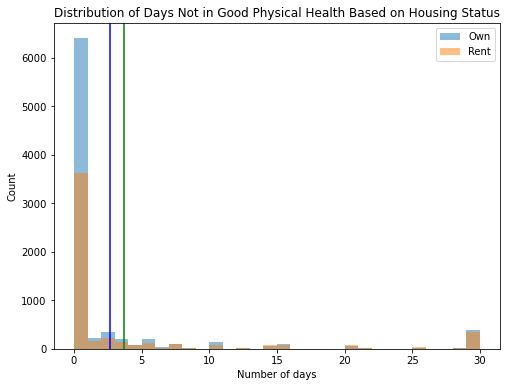

In [19]:
# Histogram of PHYSHLTH based on the value of RENTHOM1
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist(df_own, label = 'Own', bins = 30, alpha = 0.5)
plt.hist(df_rent, label = 'Rent', bins = 30, alpha = 0.5)
ax.set_xlabel('Number of days')
ax.set_ylabel('Count')
ax.set_title('Distribution of Days Not in Good Physical Health Based on Housing Status')
plt.axvline(df_own.mean(), color = 'b')
plt.axvline(df_rent.mean(), color = 'g')
plt.legend();

- The box-whisker plot suggests that the distribution of PHYSHLTH for renting home is slightly wider than that for owning.
- There are a lot of PHYSHLTH values for renting and owning home that is close to 0, meaning physically healthy.
- The histogram plot also suggests that both PHYSHLTH values for renting and owning home are similarly distributed.
- It seems that there are a lot of peopele are physically healthy with owing and renting home.
- The average PHYSHLTH value for owing home is 2.7 and for renting home is 3.7

### Is the Difference Statistically Significant?

- Null hypothesis: There is no statistically significant difference of the average days of being not physical healthy between owning home and renting
- Alternative hypothesis: There is statistically significant difference of the average days of being not physical healthy between owning home and renting
- Type I error: Draw a conclusion that the average days of being not physical healthy between owning home and renting is different, when they are actually the same (false positive).
- Type II error: Draw a conclusion that the average days of being not physical healthy between owning home and renting are the same, when it's different (false negtive).
- Test type: two sample two-tailed independent t-test.

In [20]:
# sampling both data subsets with sample size of 250
sample_own = df_own.sample(n = 250, random_state = 50)
sample_rent = df_rent.sample(n = 250, random_state = 50)
print('Variance of own sample is ', sample_own.var())
print('Variance of rent sample is ', sample_rent.var())

Variance of own sample is  49.83447389558214
Variance of rent sample is  69.03853815261074


In [21]:
# calculate test statistic and p-value for two sample two-tailed independent t-test
result = stats.ttest_ind(sample_own, sample_rent, equal_var = False, alternative = 'two-sided')
print('The test statistic is ', result[0])
print('The p-value is ', result[1])

The test statistic is  -1.432799150480845
The p-value is  0.15255904223202923


- The p-value is greater than alpha ( 0.15 > 0.05), we failed to reject the null hypothesis.
- Given the existing evidence, there is no statistically significant difference of the average days of being not physical healthy between owning home and renting

## Next Steps

There are many aspects of health questions were surveyed in the health data set. We can perform analysis such as below:
- Investigate `MENTHLTH` (Number of Days Mental Health Not Good) based on `RENTHOM1`
- Investigate `PHYSHLTH`(Number of Days Physical Health Not Good) based on `EXERANY2` (Exercise in Past 30 Days)
- Investigate `PHYSHLTH`(Number of Days Physical Health Not Good) based on ` EDUCA` (Education Level)